In [ ]:
!pip install pygmo

In [38]:
import math
import matplotlib.pyplot as plt
from pygmo import hypervolume


In [39]:
def Binary_of_float(number, places = 3):
  
    WHOLE_1, DEC_1 = str(number).split(".")
  
    WHOLE_1 = int(WHOLE_1)
    DEC_1 = int (DEC_1)
  
    res = bin(WHOLE_1).lstrip("0b") + "."

    for x in range(places):
        WHOLE_1, DEC_1 = str((Binary_of_deciaml(DEC_1)) * 2).split(".")
        DEC_1 = int(DEC_1)
        res +=WHOLE_1
  
    return res

def Binary_of_deciaml(num): 
    while num > 1:
        num /= 10
    return num
      

# 1.1


In [40]:
import random
import pandas as pd
x1 = []
x2 = []
x3 = []
f1,f2 = [],[]
F1,F2=[],[]
for i in range(0,25):
  x1.append(random.uniform(-4.0, 4.0))
  x2.append(random.uniform(-4.0, 4.0))
  x3.append(random.uniform(-4.0, 4.0))

for i in range(0,25):
  f1.append(((x1[i]/2.0)**2 + (x2[i]/4.0)**2 + (x3[i])**2)/3.0)
  f2.append( ((x1[i]/2.0)**2 + (x2[i]/4.0)**2 + (x3[i])**2)/3.0)
  F1.append(Binary_of_float((((x1[i]/2.0)**2 + (x2[i]/4.0)**2 + (x3[i])**2)/3.0),places=3))
  F2.append(Binary_of_float((((x1[i]/2.0)**2 + (x2[i]/4.0)**2 + (x3[i])**2)/3.0),places=3))
df1=pd.DataFrame({'x1':x1,'x2':x2,'x3':x3,'f1':f1,'f2':f2})
df2=pd.DataFrame({'x1':x1,'x2':x2,'x3':x3,'f1':F1,'f2':F2})
print(df1)
print(df2)



          x1        x2        x3        f1        f2
0   3.396329 -0.463742  0.856772  1.210420  1.210420
1   2.384317 -3.425570  1.474043  1.442484  1.442484
2   2.991142 -0.630697 -0.930759  1.042635  1.042635
3   2.376780  3.245979 -0.303595  0.720988  0.720988
4   1.818231 -1.276647  2.590146  2.545737  2.545737
5  -1.875183  3.790857  3.377614  4.395173  4.395173
6   3.556551  3.749164  2.646474  3.681535  3.681535
7  -3.026464 -0.467705  3.045138  3.858803  3.858803
8  -3.245514 -2.910825 -3.943497  6.238022  6.238022
9  -2.191417  1.064809 -0.079204  0.425905  0.425905
10 -2.047630 -2.778483 -2.709746  2.957807  2.957807
11  0.494700 -2.269625 -3.445242  4.084275  4.084275
12 -0.585842 -2.094402  3.589592  4.415043  4.415043
13  3.010838  3.436729  3.164745  4.340030  4.340030
14 -2.152977 -1.314803  0.462634  0.493634  0.493634
15  1.647379  0.332193  1.328151  0.816449  0.816449
16  2.365148 -0.054421  2.646456  2.800799  2.800799
17  1.393924 -1.114988 -0.411941  0.244384  0.

# 1.2


In [41]:
def Efficient_non_dominated_sorting(F_1, F_2):
    S=[[] for i in range(0,len(F_1))]
    front_1 = [[]]
    n=[0 for i in range(0,len(F_2))]
    rank = [0 for i in range(0, len(F1))]
    #stage II
    for p in range(0,len(F1)):
        S[p]=[]
        n[p]=0
        for q in range(0, len(F_1)):
            if (F_1[p] > F_1[q] and F_2[p] > F_2[q]) or (F_1[p] >= F_1[q] and F_2[p] > F_2[q]) or (F_1[p] > F_1[q] and F_2[p] >= F_2[q]):
                if q not in S[p]:
                    S[p].append(q)
            elif (F_1[q] > F_1[p] and F_2[q] > F_2[p]) or (F_1[q] >= F_1[p] and F_2[q] > F_2[p]) or (F_1[q] > F_1[p] and F_2[q] >= F_2[p]):
                n[p] = n[p] + 1
        if n[p]==0:
            rank[p] = 0
            if p not in  front_1[0]:
                 front_1[0].append(p)

    i = 0
    #stageII
    arr = []
    while( front_1[i] != []):
        Q = []
        for p in  front_1[i]:
            for q in S[p]:
                n[q] =n[q] - 1
                if( n[q]==0):
                    rank[q]=i+1
                    if q not in Q:
                        Q.append(q)
                        
        i = i+1
        front_1.append(Q)
    del  front_1[len(front_1)-1]
    return  front_1

In [42]:
NON_dominated_sorted = Efficient_non_dominated_sorting(f1[:],f2[:])
front = []
print(len(NON_dominated_sorted))
for i in range(0,25):
  front.append(NON_dominated_sorted[i])


front= sorted(front)
temp = front
front = []
# print(temp)
for i in range(0,len(temp)):
  front.append(temp[i][0])
df3=pd.DataFrame({'f1':f1,'f2':f2,'front number':front})
print(df3)

25
          f1        f2  front number
0   1.210420  1.210420             0
1   1.442484  1.442484             1
2   1.042635  1.042635             2
3   0.720988  0.720988             3
4   2.545737  2.545737             4
5   4.395173  4.395173             5
6   3.681535  3.681535             6
7   3.858803  3.858803             7
8   6.238022  6.238022             8
9   0.425905  0.425905             9
10  2.957807  2.957807            10
11  4.084275  4.084275            11
12  4.415043  4.415043            12
13  4.340030  4.340030            13
14  0.493634  0.493634            14
15  0.816449  0.816449            15
16  2.800799  2.800799            16
17  0.244384  0.244384            17
18  2.032478  2.032478            18
19  0.159211  0.159211            19
20  5.768899  5.768899            20
21  1.719755  1.719755            21
22  0.255759  0.255759            22
23  4.322017  4.322017            23
24  4.276984  4.276984            24


In [43]:
def Position(a,list):
    for i in range(0,len(list)):
        if list[i] == a:
            return i
        
    return -1

# 1.3

In [47]:
def Sort_Val(L1, V):
    sorted_list = []
    while(len(sorted_list)!=len(L1)):
        if Position(min(V),V) in L1:
            sorted_list.append(Position(min(V),V))
        else:
          values[Position(min(V),V)] = math.inf
    return sorted_list

def Corwding_distsance(v1, v2, f):

    distance = [0 for i in range(0,len(f))]
   
    sorted1 = Sort_Val(f, v1[:])
    # print(values1)
    sorted2 = Sort_Val(f, v2[:])
    distance[0] = 999999999999999
    distance[len(f) - 1] = 999999999999999
    for k in range(1,len(f)-1):
        distance[k] = distance[k]+ (v1[sorted1[k+1]] - v2[sorted1[k-1]])/(max(v1)-min(v1))
    for k in range(1,len(f)-1):
        distance[k] = distance[k]+ (v1[sorted2[k+1]] - v2[sorted2[k-1]])/(max(v2)-min(v2))
    return distance

In [48]:
distance=[]
distance=Corwding_distsance(f1,f2,front)
df5=pd.DataFrame({'f1':f1,'f2':f2,'front number':front,'crowding distance':distance})
print(df5)


          f1        f2  front number  crowding distance
0   1.210420  1.210420             0       1.000000e+15
1   1.442484  1.442484             1       0.000000e+00
2   1.042635  1.042635             2       0.000000e+00
3   0.720988  0.720988             3       0.000000e+00
4   2.545737  2.545737             4       0.000000e+00
5   4.395173  4.395173             5       0.000000e+00
6   3.681535  3.681535             6       0.000000e+00
7   3.858803  3.858803             7       0.000000e+00
8   6.238022  6.238022             8       0.000000e+00
9   0.425905  0.425905             9       0.000000e+00
10  2.957807  2.957807            10       0.000000e+00
11  4.084275  4.084275            11       0.000000e+00
12  4.415043  4.415043            12       0.000000e+00
13  4.340030  4.340030            13       0.000000e+00
14  0.493634  0.493634            14       0.000000e+00
15  0.816449  0.816449            15       0.000000e+00
16  2.800799  2.800799            16       0.000

#1.4

In [52]:
def Crossover(a,b):
    r=random.random()
    if r>0.9:
        return Mutation((a+b)/2)
    else:
        return Mutation((a-b)/2)

#Function to carry out the mutation operator
def Mutation(solution):
    mutation_prob = random.random()
    if mutation_prob <1/12:
        solution = -4+(4+4)*random.random()
        
    return solution


In [53]:
def generate_population():
   X=[]
   for i in range(25):
    X.append(random.uniform(-4.0, 4.0))
   return X
  

In [54]:
# generate the offspring
X_1=[]
X_2=[]
X_3=[]
#X_1=generate_population()
#X_2=generate_population()
#X_3=generate_population()
for i in range(25):
  p1=random.randint(0,24)
  p2=random.randint(0,24)
  X_1.append(Crossover(x1[p1],x1[p2]))
  X_2.append(Crossover(x2[p1],x2[p2]))                         #x ki value ko cross
  X_3.append(Crossover(x3[p1],x3[p2]))
f3,f4 =[],[]
for i in range(0,25):
  f3.append(((X_1[i]/2.0)**2 + (X_2[i]/4.0)**2 + (X_3[i])**2)/3.0)
  f4.append( ((X_1[i]/2.0)**2 + (X_2[i]/4.0)**2 + (X_3[i])**2)/3.0)
df1=pd.DataFrame({'x1':X_1,'x2':X_2,'x3':X_3,'f1':f3,'f2':f4})
print(df1)




          x1        x2        x3        f1        f2
0  -1.792670  2.631247  0.166369  0.421271  0.421271
1   0.000000  3.080163  0.000000  0.197654  0.197654
2   2.912604 -3.378034  0.123411  0.949747  0.949747
3  -1.877533 -1.533271  1.292114  0.899258  0.899258
4   0.624737 -1.132844 -0.653212  0.201489  0.201489
5   0.869160  2.512905  0.028164  0.194774  0.194774
6   0.965602 -0.814925 -0.292343  0.120023  0.120023
7  -2.519386 -1.704590 -0.889494  0.853209  0.853209
8  -0.874475  0.397967  0.235690  0.085542  0.085542
9  -2.401486 -1.658857  0.000000  0.537924  0.537924
10 -0.364700 -0.962005  0.815873  0.252247  0.252247
11  0.304676 -2.864805 -3.256975  3.714680  3.714680
12 -1.063434 -2.056058  0.202438  0.195972  0.195972
13  3.373595 -0.764276  0.467988  1.033602  1.033602
14 -0.422014 -0.625984 -0.297145  0.052437  0.052437
15  3.153185  1.185960  1.621974  1.734784  1.734784
16  0.155518  3.329994  3.294986  3.852010  3.852010
17  0.576340  1.300909  2.386696  1.961711  1.

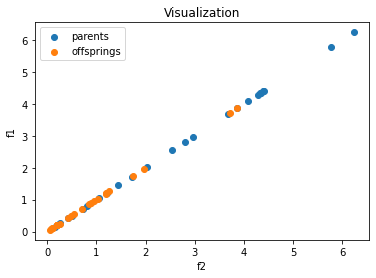

In [55]:
plt.scatter(f1,f2)  #sample poplulation
plt.scatter(f3,f4)    #offspring
label = ['parents','offsprings']
plt.legend(label)
plt.title('Visualization')
plt.xlabel('f2')
plt.ylabel('f1')
plt.show()

#1.5

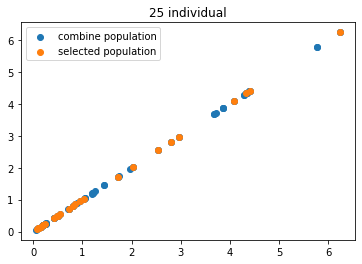

In [57]:
combine_population_f1=[]
combine_population_f2=[]
select1 = []
select2 = []
for i in range(25):
  f3.append(f1[i])
  f4.append(f2[i])
combine_population_f1=f3##combine population
combine_population_f2=f4

arr1 = random.sample(range(0,50),25)
for i in range(0,25):
  select1.append(combine_population_f1[arr1[i]])
  select2.append(combine_population_f2[arr1[i]])
crowding_distance_values=[]
non_dominated_sorted_offspring2 = Efficient_non_dominated_sorting(select1,select2)
front4 = []
for i in range(0,25):
   front4.append(non_dominated_sorted_offspring2) 
front4= sorted(front4)
for i in range(0,len(non_dominated_sorted_offspring2)):
   crowding_distance_values.append(crowding_distance(select1,select2,front))

plt.scatter(combine_population_f1,combine_population_f2)  #combined poplulation
plt.scatter(select1,select2)    #selected population
plt.title('25 individual')
plt.legend(['combine population','selected population'])
plt.show()

#1.6


In [60]:
gen_no=0
X_1=[]
X_2=[]
X_3=[]
crowding_distance_values=[]
while(gen_no!=40):
 for i in range(25):
    p1=random.randint(0,24)
    p2=random.randint(0,24)
    X_1.append(Crossover(x1[p1],x1[p2]))
    X_2.append(Crossover(x2[p1],x2[p2]))                         #x ki value ko cross
    X_3.append(Crossover(x3[p1],x3[p2]))

 f3,f4 =[],[]
 for i in range(0,25):
   f3.append(((X_1[i]/2.0)**2 + (X_2[i]/4.0)**2 + (X_3[i])**2)/3.0)
   f4.append( ((X_1[i]/2.0)**2 + (X_2[i]/4.0)**2 + (X_3[i])**2))
 
 non_dominated_sorted_offspring2 = Efficient_non_dominated_sorting(f3[:],f4[:])
 front4 = []
 for i in range(0,24):
   front4.append(non_dominated_sorted_offspring2[i][0]) 
 front4= sorted(front4)
 print("The best front for Generation number ",gen_no, " is")
 for i in range(0,24):
    print("x1=",X_1[front4[i]],"x_2=",X_2[front4[i]],'X_3=',X_3[front4[i]])
    print("\n")
 gen_no+=1







The best front for Generation number  0  is
x1= 0.43674350676751095 x_2= -0.4235488838753301 X_3= -1.2912520042891358


x1= 0.7828538982680828 x_2= -1.1679698142194255 X_3= 1.0751970311186194


x1= 0.17692779757580812 x_2= -0.5598130881484749 X_3= 0.31972985122935516


x1= 1.635525276208404 x_2= 2.000884623038999 X_3= 1.9143176586006998


x1= -0.49440737782884225 x_2= 1.0168988251323472 X_3= -0.5624008467097594


x1= 0.7835675144733445 x_2= -0.38979988763405427 X_3= 1.563478737804222


x1= 2.2031440305336156 x_2= 0.20664185362085208 X_3= 2.84579716214715


x1= -3.40103283501768 x_2= -3.329994261557243 X_3= -3.2949856286759838


x1= 0.0 x_2= -0.6753871934893949 X_3= 0.0


x1= -1.7207770133257734 x_2= -0.8317474824257953 X_3= -1.1489026183569582


x1= 2.5912794721513555 x_2= -0.8477532533399912 X_3= -0.42577749852948665


x1= 2.4199164662488672 x_2= 2.1929678657877782 X_3= 1.8299202070128353


x1= -3.216016386768425 x_2= 1.34990002932587 X_3= 2.3480817798633984


x1= 0.3132603358218926 x

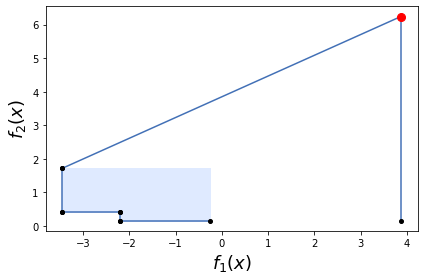

In [61]:
 import numpy as np
import matplotlib.pyplot as plt

def plot_hyper_volume(x, y, reference_point):
    x = np.array(x)
    y = np.array(y)
    coordinates = np.array(sorted(zip(x, y)))
    pareto_set = np.full(coordinates.shape, np.inf)

    i = 0
    for point in coordinates:
        if i == 0:
            pareto_set[i] = point
            i += 1
        elif point[1] < pareto_set[:, 1].min():
            pareto_set[i] = point
            i += 1

    # Get rid of unused spaces
    pareto_set = pareto_set[:i + 1, :]

    # Add reference point to the pareto set
    pareto_set[i] = reference_point

    # These points will define the path to be plotted and filled
    x_path_of_points = []
    y_path_of_points = []

    for index, point in enumerate(pareto_set):

        if index < i - 1:
            plt.plot([point[0], point[0]], [point[1], pareto_set[index + 1][1]], marker='o', markersize=4, c='#4270b6',
                     mfc='black', mec='black')
            plt.plot([point[0], pareto_set[index + 1][0]], [pareto_set[index + 1][1], pareto_set[index + 1][1]],
                     marker='o', markersize=4, c='#4270b6', mfc='black', mec='black')

            x_path_of_points += [point[0], point[0], pareto_set[index + 1][0]]
            y_path_of_points += [point[1], pareto_set[index + 1][1], pareto_set[index + 1][1]]

    # Link 1 to Reference Point
    plt.plot([pareto_set[0][0], reference_point[0]], [pareto_set[0][1], reference_point[1]], marker='o', markersize=4,
             c='#4270b6', mfc='black', mec='black')
    # Link 2 to Reference Point
    plt.plot([pareto_set[-1][0], reference_point[0]], [pareto_set[-2][1], reference_point[1]], marker='o', markersize=4,
             c='#4270b6', mfc='black', mec='black')
    # Highlight the Reference Point
    plt.plot(reference_point[0], reference_point[1], 'o', color='red', markersize=8)

    # Fill the area between the Pareto set and Ref y
    plt.fill_betweenx(y_path_of_points, x_path_of_points, max(x_path_of_points) * np.ones(len(x_path_of_points)),
                      color='#dfeaff', alpha=1)

    plt.xlabel(r"$f_{\mathrm{1}}(x)$", fontsize=18)
    plt.ylabel(r"$f_{\mathrm{2}}(x)$", fontsize=18)
    plt.tight_layout()

    plt.show()

ref = [max(x1), max(f1)]

plot_hyper_volume(x=x1, y=f1, reference_point=ref)

